In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
import matplotlib.pyplot as plt
# load data
r_data = pd.read_csv("../result/join_weather_flower/Anthurium_C0V360_內門.csv")
r_data = r_data.dropna()
gb_df  = r_data.groupby("year")
r_data = gb_df.get_group(2014.0)
# print(r_data)
r_data = r_data.reset_index()
r_data = r_data.drop(columns="index")
r_data["d_temp"] = r_data['T.Max'] - r_data['T.Min']
# select year

# r_data
# r_data
# remove "/" or not double data
# col_x = ['Temperature', 'd_temp','Precp', 'RH']
col_x = ['Temperature', 'd_temp', 'Precp', 'WS', 'WSGust']
for col in col_x:
    old = r_data[col]
    new = []
    for i in range(len(old)):
        try:
            new.append(float(old[i]))
            tmp = float(old[i])
        except ValueError:
            new.append(tmp)
    r_data[col] = new
# Normalize data
# col_x = ['Temperature', 'T.Max', 'T.Min', 'Precp', 'RH', 'StnPres', 'WS', 'WSGust']
x_data = r_data[col_x]
# x = (x_data - x_data.mean()) / (x_data.std())
x = x_data
y = r_data["avg_price"]
# shift
result = []
n = 20
for s_d in range(1,n):
    x_new = np.array(x.drop(index=list(range(s_d)),axis=0))
    y_new = y[:-s_d]
#     print(len(x_new), len(y_new))
#     print(s_d)
    model = sm.regression.linear_model.OLS(y_new, x_new)
    result.append(model.fit().rsquared)
#     print(s_d,"\t", result.rsquared)
# print(matplotlib.pyplot.scatter(range(1,n),result))
model.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              avg_price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.2267
Date:                Sat, 04 May 2019   Prob (F-statistic):              0.951
Time:                        02:27:29   Log-Likelihood:                -1142.9
No. Observations:                 295   AIC:                             2296.
Df Residuals:                     290   BIC:                             2314.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.7080      0.747     -0.948      0.344      -2.177       0.761
x2             0.0649      0.770      0.084      0.933      -1.451       1.581
x3             0.1711      0.743      0.230      0.818      -1.292       1.634
x4            -0.0888      0.774     -0.115      0.909      -1.612       1.435
x5             0.3555      0.794      0.448      0.655      -1.207       1.918
==============================================================================
Omnibus:                       57.400   Durbin-Watson:                   0.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.396
Skew:                           1.013   Prob(JB):                     3.92e-25
Kurtosis:                       5.244   Cond. No.                         2.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
model_new= sm.regression.linear_model.OLS(y, x)
res = model_new.fit()
print(res.summary2())
y_pre = res.predict(x)



# fig, ax = plt.subplots()
# x_draw = range(len(y_pre))
# ax.plot(x_draw, y_pre, label="Data")
# ax.plot(x_draw, y,label="True")
# ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), 'r', label="OLS prediction")
# ax.legend(loc="best");
cf = pd.DataFrame()
cf["pre"] = y_pre
cf["ans"] = y_new
# print(cf.corr())
# cf.to_csv("test0504.csv")
# cf

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.930    
Dependent Variable: avg_price        AIC:                1603.5708
Date:               2019-05-04 02:26 BIC:                1622.3177
No. Observations:   314              Log-Likelihood:     -796.79  
Df Model:           5                F-statistic:        838.9    
Df Residuals:       309              Prob (F-statistic): 2.20e-177
R-squared:          0.931            Scale:              9.5185   
-------------------------------------------------------------------
                 Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
-------------------------------------------------------------------
Temperature     -0.0553    0.0294  -1.8820  0.0608  -0.1131  0.0025
d_temp           0.6773    0.0420  16.1088  0.0000   0.5946  0.7601
Precp            0.0186    0.0119   1.5629  0.1191  -0.0048  0.0419
WS               4.8139    0.7044   6.8342  0.0000   3.4279  6.2000
WSGust

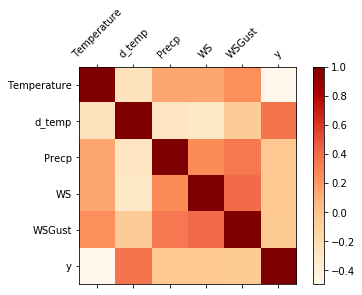

             Temperature    d_temp     Precp        WS    WSGust         y
Temperature     1.000000 -0.259976  0.151122  0.143987  0.245511 -0.495351
d_temp         -0.259976  1.000000 -0.284889 -0.311649 -0.061357  0.365119
Precp           0.151122 -0.284889  1.000000  0.254395  0.347803 -0.035031
WS              0.143987 -0.311649  0.254395  1.000000  0.408521 -0.028142
WSGust          0.245511 -0.061357  0.347803  0.408521  1.000000 -0.046049
y              -0.495351  0.365119 -0.035031 -0.028142 -0.046049  1.000000


In [7]:

data = x.copy()
data["y"] = y
# print(data.corr())
c_data = data.corr()
c = data.columns.to_list()


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(c_data,cmap="OrRd")
fig.colorbar(cax)

ax.set_xticklabels(['']+c)
ax.set_yticklabels(['']+c)
plt.xticks(rotation=45)
plt.show()
print(c_data)

In [4]:
data.describe()

,Temperature,d_temp,Precp,WS,WSGust,y
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.073885,11.888217,4.498408,0.850955,5.932166,11.245927
std,4.695728,3.328119,16.333901,0.252557,1.994982,3.175495
min,10.800000,2.000000,0.000000,0.400000,2.900000,5.976000
25%,19.575000,9.825000,0.000000,0.700000,4.900000,9.336250
50%,24.600000,11.800000,0.000000,0.800000,5.500000,10.665500
75%,26.900000,14.000000,0.500000,1.000000,6.500000,13.058250
max,30.000000,21.100000,156.500000,2.600000,27.800000,28.230000


In [5]:

# x